In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

import warnings
warnings.filterwarnings('ignore')

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

products = pd.read_csv('Downloads/mo_c/customers.csv')
orders= pd.read_csv('Downloads/mo_c/orders.csv')
customers = pd.read_csv('Downloads/mo_c/products.csv')

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

df01 = pd.merge(products,orders)
d_f = pd.merge(df01,customers)

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

d_f['Revenue'] = d_f['Unit Price'] * d_f['Quantity']

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

df = d_f[['Order Date','Revenue']]

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

df.columns=['Date', 'Revenue']

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

df['Date'] = pd.to_datetime(df['Date'])
# df.set_index('Date', inplace=False) # True : to set date as index
df.head()

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

# sorting date vslues
df = df.sort_values(by='Date',ascending=True)




In [2]:
df.head()

,Date,Revenue
500,2019-01-02,11.940
501,2019-01-02,16.500
502,2019-01-02,51.800
503,2019-01-02,14.265
8,2019-01-02,17.910


In [3]:
df = df.rename(columns={'Revenue': 'y', 'Date':'ds'})

In [4]:
df.head()

,ds,y
500,2019-01-02,11.940
501,2019-01-02,16.500
502,2019-01-02,51.800
503,2019-01-02,14.265
8,2019-01-02,17.910


In [5]:
df['y_orig'] = df['y']
print(df.head(5))

            ds       y  y_orig
500 2019-01-02  11.940  11.940
501 2019-01-02  16.500  16.500
502 2019-01-02  51.800  51.800
503 2019-01-02  14.265  14.265
8   2019-01-02  17.910  17.910


In [6]:
# to save a copy of the original data..you'll see why shortly.
df['y'] = np.log(df['y'])

In [7]:
df.head(5)

,ds,y,y_orig
500,2019-01-02,2.479894,11.940
501,2019-01-02,2.803360,16.500
502,2019-01-02,3.947390,51.800
503,2019-01-02,2.657809,14.265
8,2019-01-02,2.885359,17.910


In [8]:
from prophet import Prophet

In [9]:
model = Prophet() #instantiate Prophet
model.add_country_holidays(country_name='US')
model.fit(df)

#train_test_split: df: train/test, then run the code for train, compare the prediction vs test

20:34:58 - cmdstanpy - INFO - Chain [1] start processing
20:34:58 - cmdstanpy - INFO - Chain [1] done processing


In [10]:
'''     'year': 'A',
        'quarter': 'Q',
        'month': 'M',
        'day': 'D',
        'hour': 'H',
        'minute': 'T',
        'second': 'S',
        'millisecond': 'L',
        'microsecond': 'U',
        'nanosecond': 'N'}
'''
# future_data = model.make_future_dataframe(periods=6, freq = 'H')
# future_data = model.make_future_dataframe(periods=12, freq = 'M')
future_data = model.make_future_dataframe(periods=12, freq = 'D')

In [11]:
forecast_data = model.predict(future_data)

In [12]:
# forecast_data.tail(5)

In [13]:
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
696,2022-08-27,3.316278,2.077779,4.464352
697,2022-08-28,3.532481,2.402053,4.689810
698,2022-08-29,3.283955,2.015903,4.508967
699,2022-08-30,3.232818,2.061850,4.452527
700,2022-08-31,3.339734,2.109040,4.509156


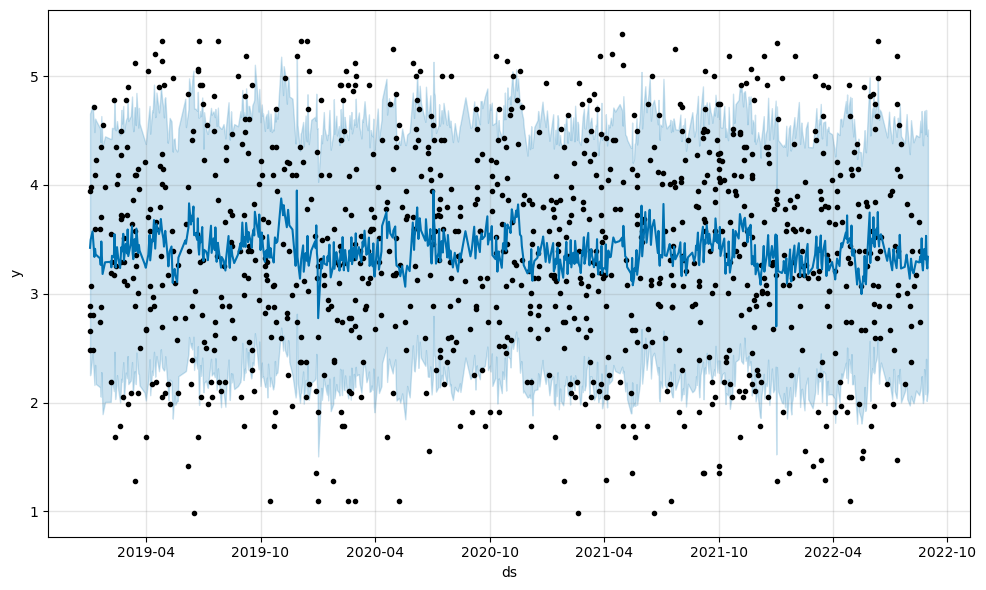

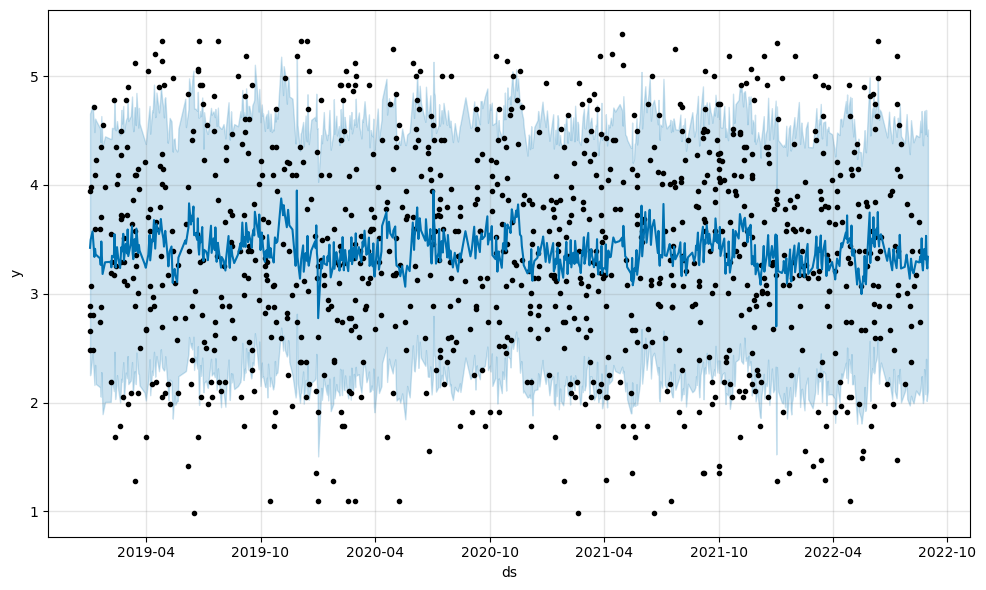

In [14]:
model.plot(forecast_data)

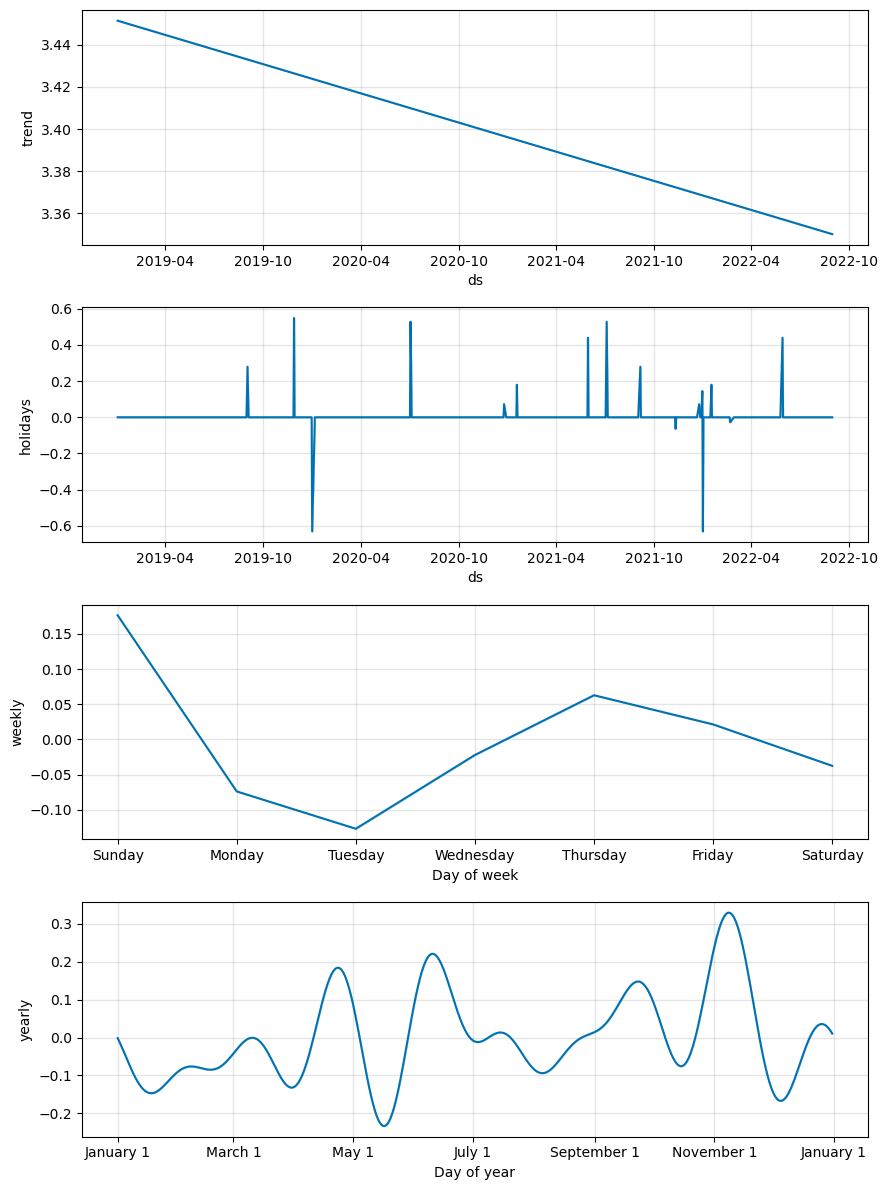

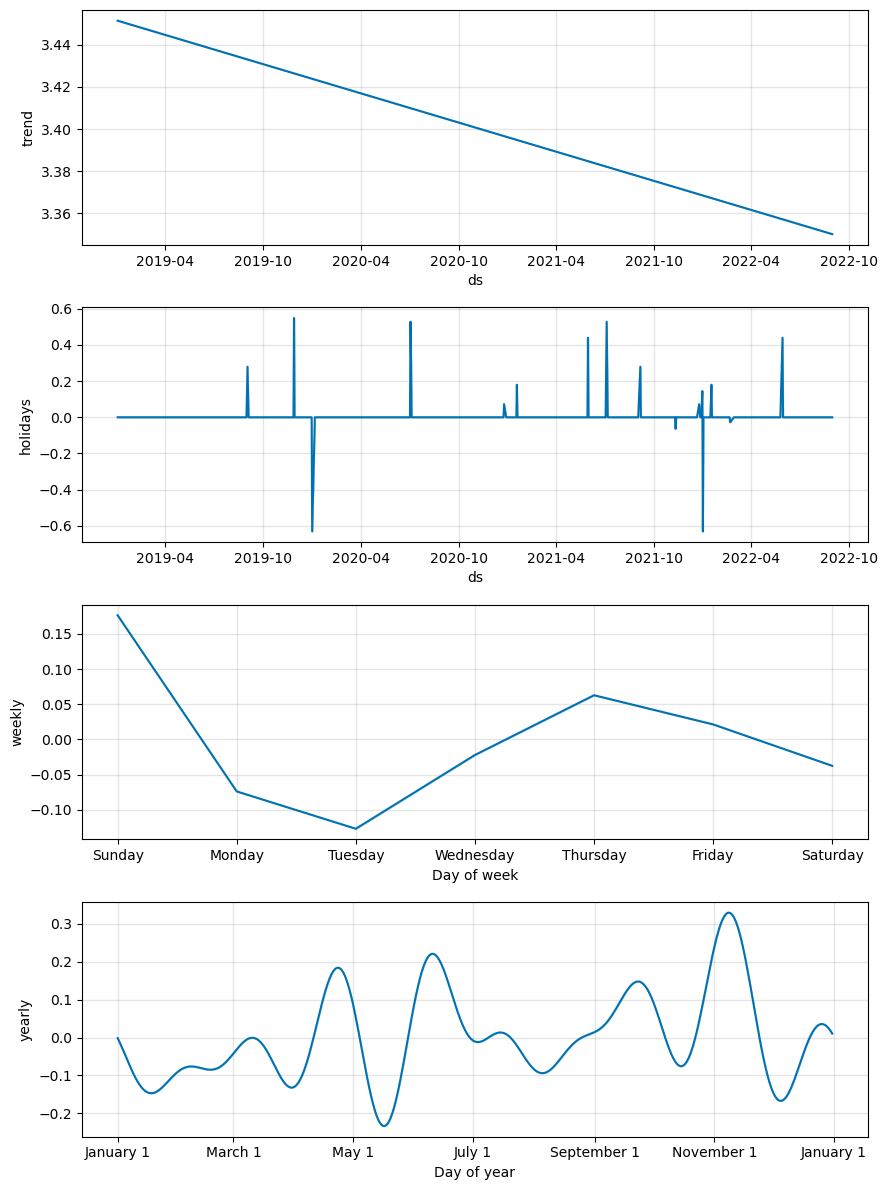

In [15]:
model.plot_components(forecast_data)

In [16]:
forecast_data_orig = forecast_data # make sure we save the original forecast data
forecast_data_orig['yhat'] = np.exp(forecast_data_orig['yhat'])
forecast_data_orig['yhat_lower'] = np.exp(forecast_data_orig['yhat_lower'])
forecast_data_orig['yhat_upper'] = np.exp(forecast_data_orig['yhat_upper'])

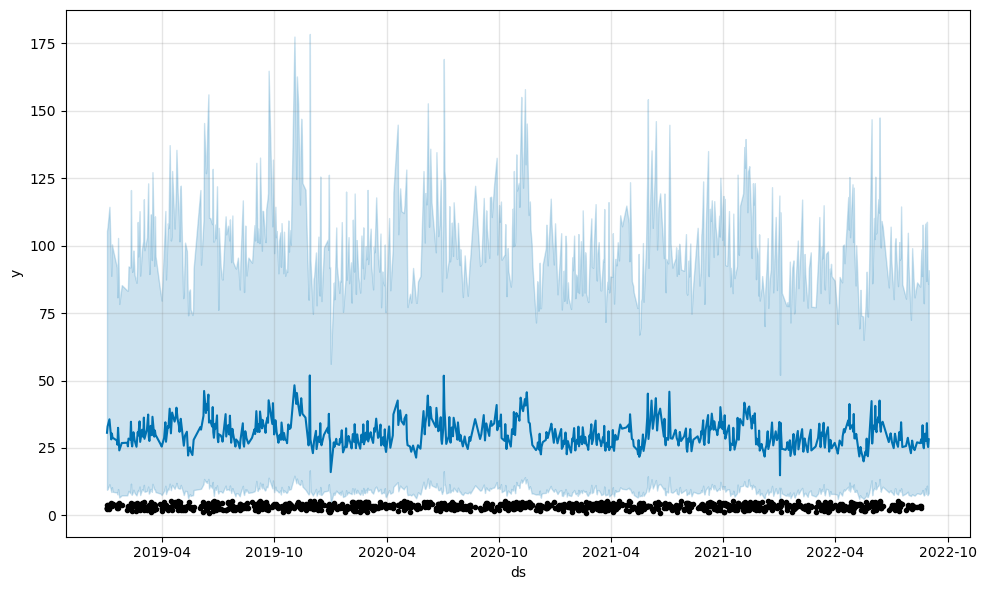

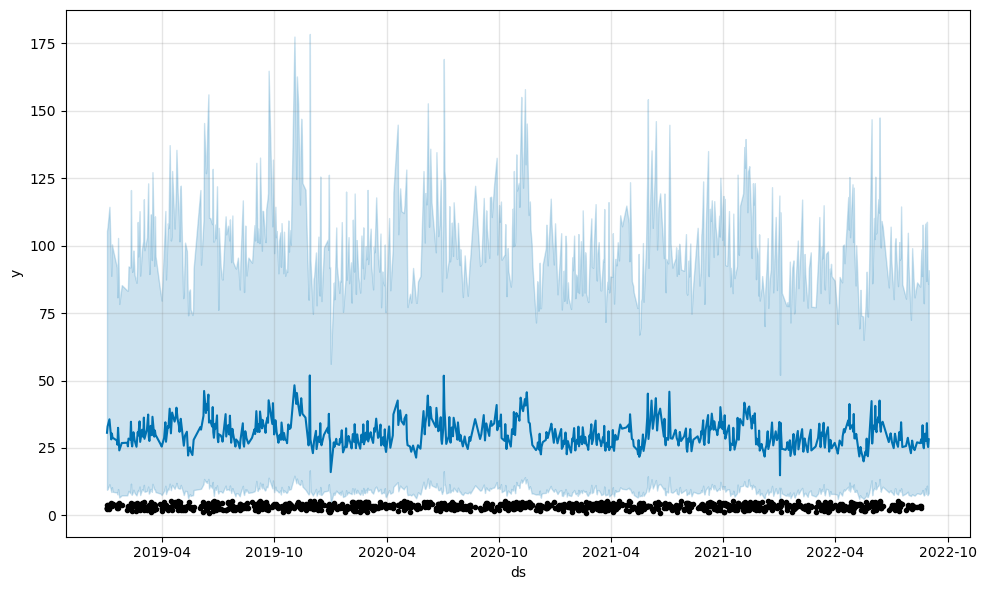

In [17]:
model.plot(forecast_data_orig)

In [18]:
df['y_log']=df['y'] #copy the log-transformed data to another column
df['y']=df['y_orig']

In [19]:
final_df = pd.DataFrame(forecast_data_orig)

In [20]:
import plotly.graph_objs as go
import plotly.offline as py

In [21]:
#Plot predicted and actual line graph with X=dates, Y=Outbound
actual_chart = go.Scatter(y=df["y_orig"], name= 'Actual')
predict_chart = go.Scatter(y=final_df["yhat"], name= 'Predicted')
predict_chart_upper = go.Scatter(y=final_df["yhat_upper"], name= 'Predicted Upper')
predict_chart_lower = go.Scatter(y=final_df["yhat_lower"], name= 'Predicted Lower')
py.plot([actual_chart, predict_chart, predict_chart_upper, predict_chart_lower], image_width=400, image_height=400)
#py.plot([actual_chart, predict_chart, predict_chart_upper, predict_chart_lower], filename = 'templates/' +'filename.html', auto_open=False)

'temp-plot.html'